In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Load the dataset

df = pd.read_csv('C:/Users/Admin/Downloads/spotify tack dataset.csv', index_col=0) #index_col 0 to drop the extra index column

# Display the first few rows of the dataset
print(df.head())




                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4   

In [3]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [5]:
df.shape

(114000, 20)

In [6]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
df = df.dropna(axis=0)

In [8]:
df['track_genre'].nunique() # Checking how many genres are there

114

In [9]:
df["explicit"] = df["explicit"].astype(int)
num = df.select_dtypes(include=[float, int])


In [10]:
df[df.duplicated()] # checking duplicate rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,0,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,0,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,0,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,0,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,0,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,0,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,0,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,0,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,0,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [11]:
df.describe().style.background_gradient(cmap="Accent") # Dark boxes denote very high values

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,228031.153387,0.085501,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,107296.057716,0.279627,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8586.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,174066.000000,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,212906.000000,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,261506.000000,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5237295.000000,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


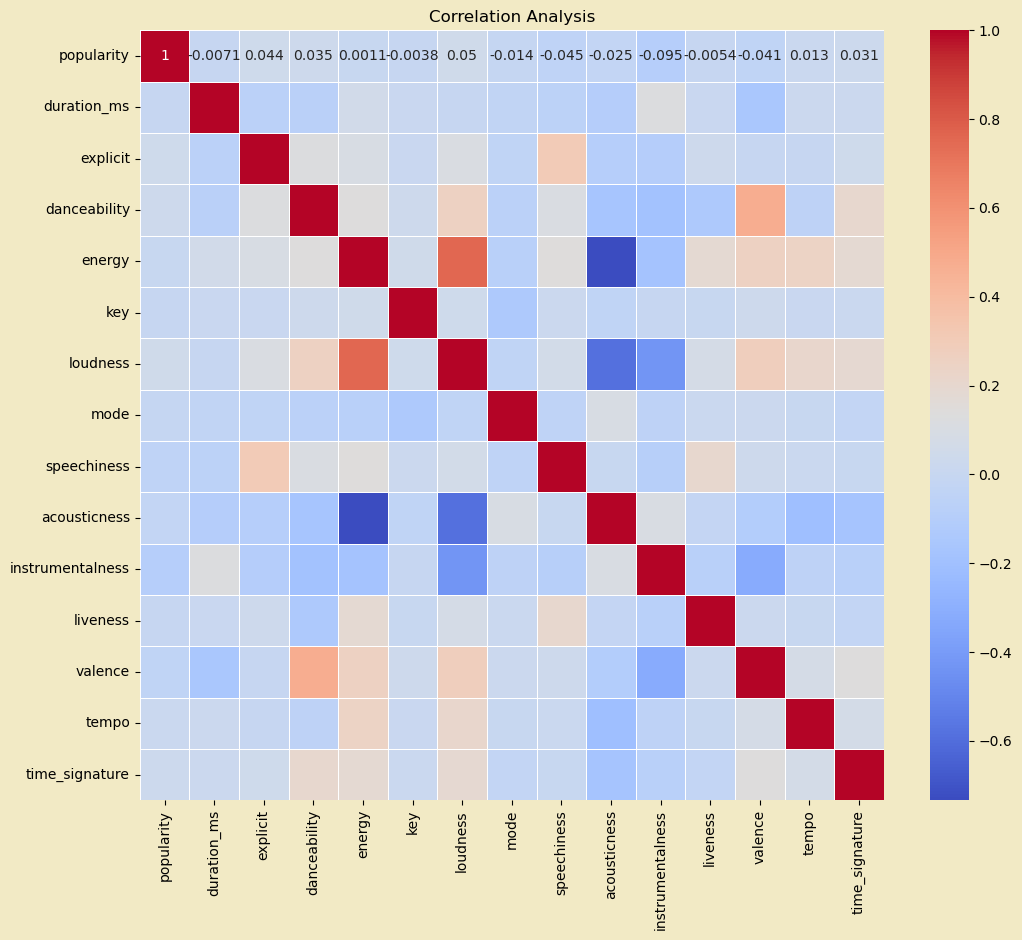

In [12]:
# Including numerical colmumns
corr_mat = df.select_dtypes(include=["int", "float"]).corr()

# Adjusting figure visuals
plt.figure(figsize=(12, 10), facecolor='#F2EAC5', edgecolor='black')
ax = plt.axes()
ax.set_facecolor('#F2EAC5')
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Analysis')
plt.show()

#### Observations:

* There is a strong positive correlation between "loudness" and "energy".

* There is a strong negative correlation between "acousticness" and "energy".

* There is a strong negative correlation between "acousticness" and "loudness".

* There is a negative correlation between "instrumentalness" and "loudness".

* There is a weak positive correlation between "valence" (positiveness) and "danceability".

* There is a weak positive correlation between "speechiness" and "explicit".

In [14]:
num_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
num_cols.shape
print(df["explicit"].dtype)

int32


In [15]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        113999 non-null  int64  
 1   duration_ms       113999 non-null  int64  
 2   danceability      113999 non-null  float64
 3   energy            113999 non-null  float64
 4   key               113999 non-null  int64  
 5   loudness          113999 non-null  float64
 6   mode              113999 non-null  int64  
 7   speechiness       113999 non-null  float64
 8   acousticness      113999 non-null  float64
 9   instrumentalness  113999 non-null  float64
 10  liveness          113999 non-null  float64
 11  valence           113999 non-null  float64
 12  tempo             113999 non-null  float64
 13  time_signature    113999 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 13.0 MB


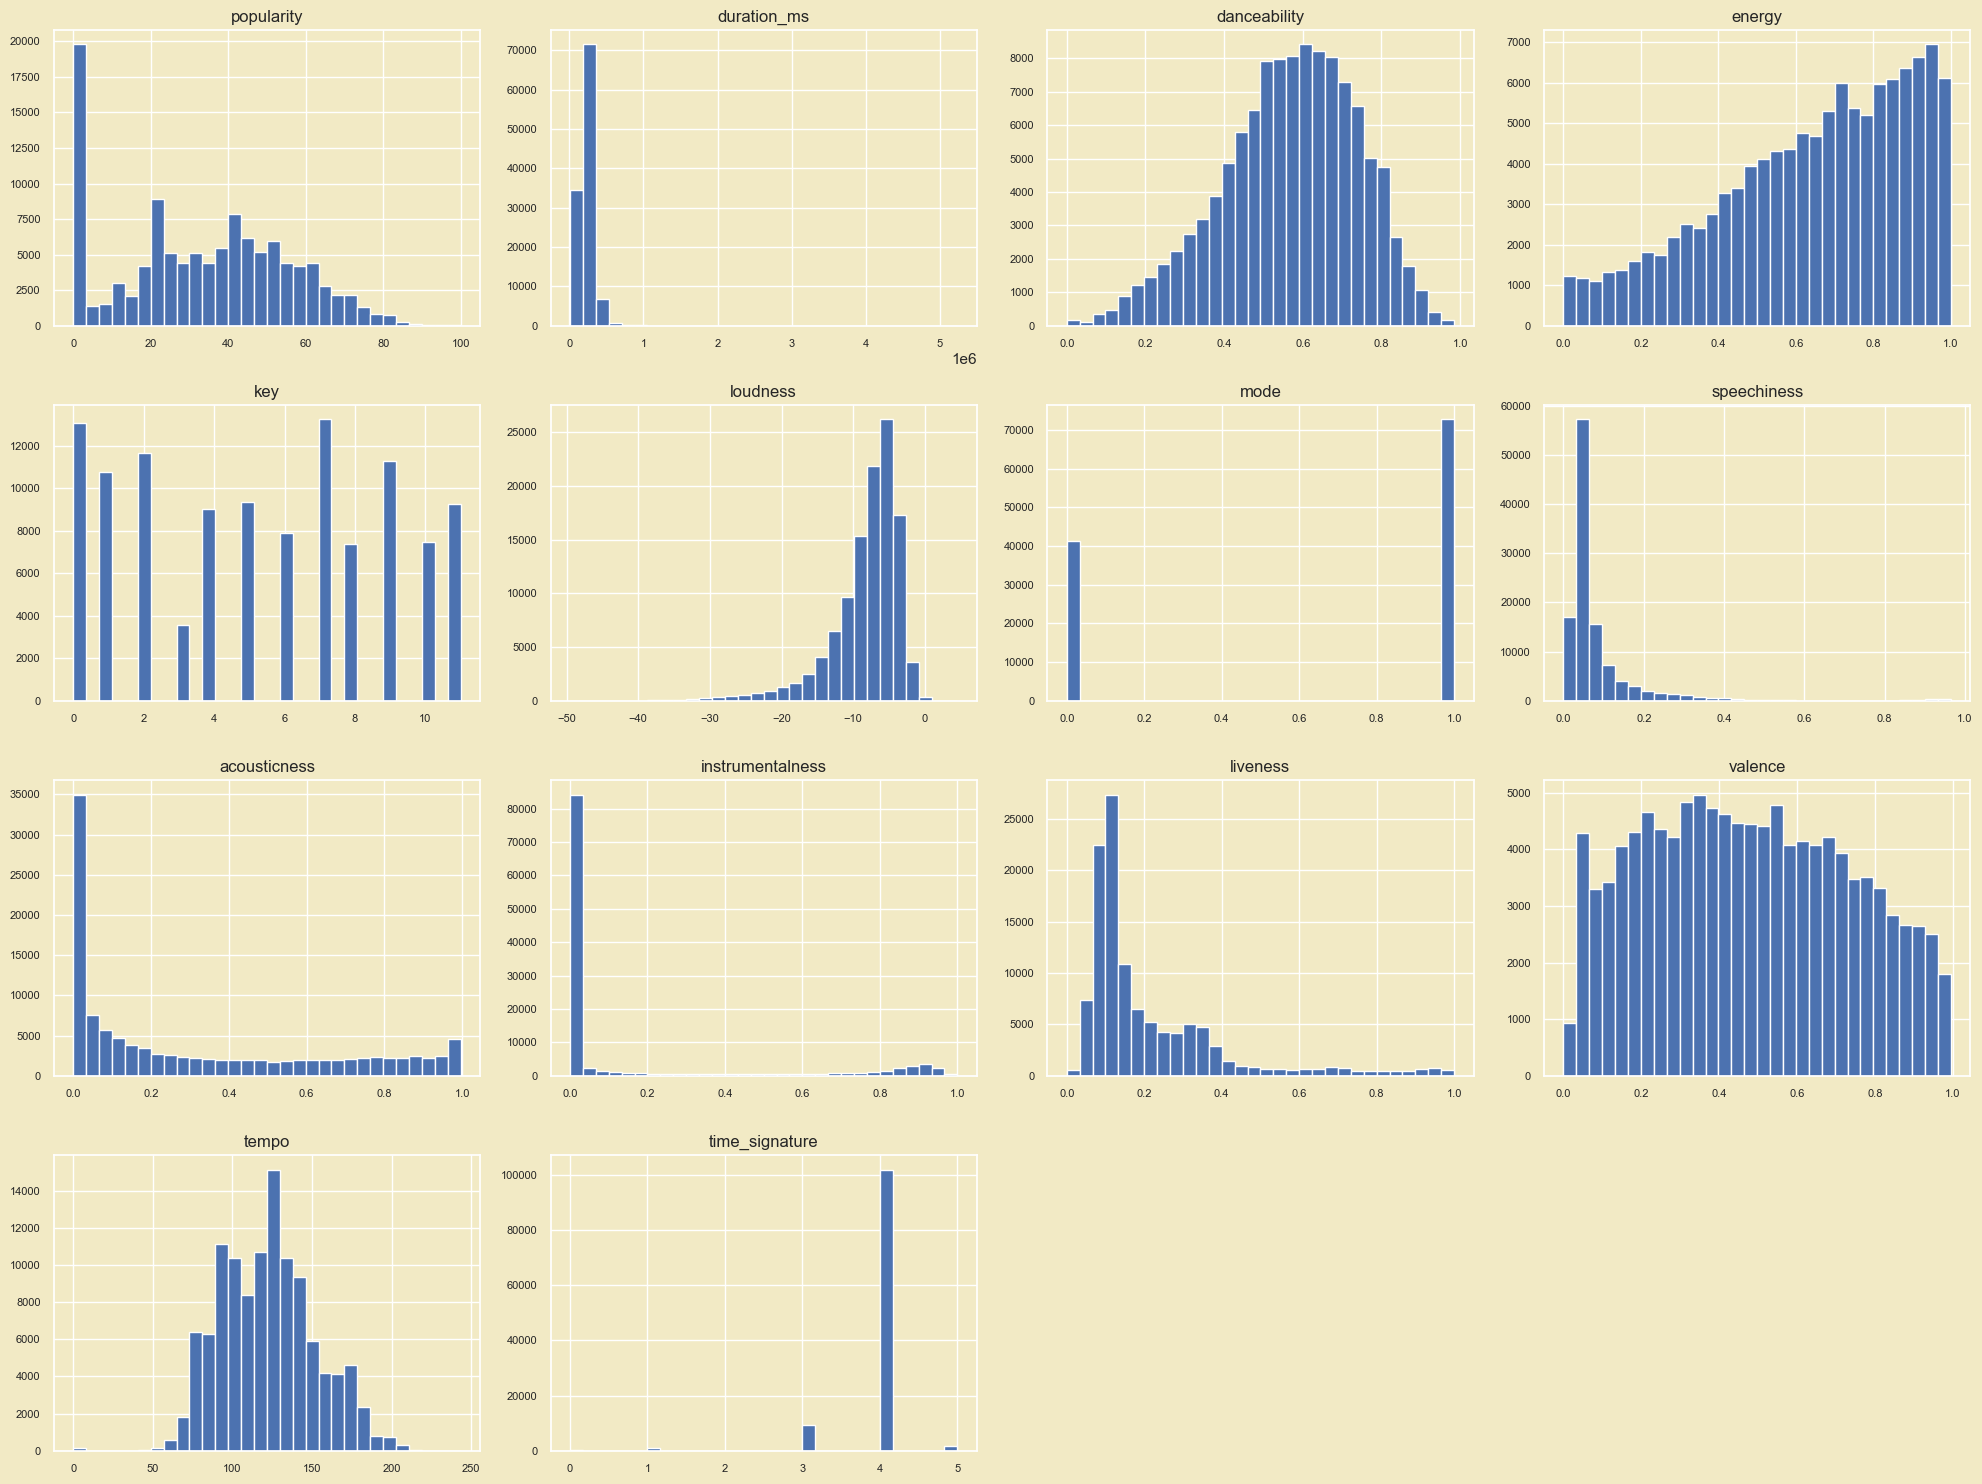

In [16]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
num_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

#### Observations:
* The distributions in the columns danceability, tempo, and valence are almost normal.

* The loudness column has a skew to the left, with the majority of the tracks having noise levels between -15 and -5 dB.

* Songs with low values appear in the right-skewed distributions of the speechiness, acousticness, instrumentalness, and liveness columns.

* A large number of songs have a popularity score of 0, while the other songs are mostly within the normal range.

* The duration_ms column displays a distribution that is biased to the right; the longest song is around 5 million ms (83 minutes) long, while the majority of songs last less than 500,000 ms (8 minutes).

* Songs mostly with values between 0.4 and 0.9 make up the growing distribution of the energy column, which runs from 0 to 1.

* The values in the key column are evenly distributed and range from 0 to 11.

* Most songs have a "mode" value of 1.

* The most common "time_signature" value is 5.

* The values in columns like "danceability", "energy", "speechiness", etc. range from 0 to 1.

In [18]:
# Select and scale the relevant features
features = df[['danceability','energy', 'loudness', 'valence', 'tempo']] # features selected by refering correlation matrix
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [19]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [20]:
# Genre to category mapping for playlist creation
genre_to_category = {
    # EDM
    'edm': 'Electronic Dance Music',
    'house': 'Electronic Dance Music',
    'electro': 'Electronic Dance Music',
    'trance': 'Electronic Dance Music',
    'techno': 'Electronic Dance Music',
    'dubstep': 'Electronic Dance Music',
    'drum-and-bass': 'Electronic Dance Music',
    'deep-house': 'Electronic Dance Music',
    'detroit-techno': 'Electronic Dance Music',
    'minimal-techno': 'Electronic Dance Music',
    'progressive-house': 'Electronic Dance Music',
    'breakbeat': 'Electronic Dance Music',

    # Rock
    'alt-rock': 'Rock',
    'rock': 'Rock',
    'indie': 'Rock',
    'indie-pop': 'Rock',
    'punk': 'Rock',
    'punk-rock': 'Rock',
    'hard-rock': 'Rock',
    'metal': 'Rock',
    'heavy-metal': 'Rock',
    'black-metal': 'Rock',
    'death-metal': 'Rock',
    'grunge': 'Rock',

    # Hip-Hop and R&B
    'hip-hop': 'Hip-Hop and R&B',
    'r-n-b': 'Hip-Hop and R&B',
    'trap': 'Hip-Hop and R&B',

    # Pop
    'pop': 'Pop',
    'electro-pop': 'Pop',
    'synth-pop': 'Pop',
    'k-pop': 'Pop',
    'pop-film': 'Pop',
    'power-pop': 'Pop',

    # Latin & Reggae/Dancehall
    'latin': 'Latin & Reggae/Dancehall',
    'reggaeton': 'Latin & Reggae/Dancehall',
    'salsa': 'Latin & Reggae/Dancehall',
    'samba': 'Latin & Reggae/Dancehall',
    'reggae': 'Latin & Reggae/Dancehall',
    'dancehall': 'Latin & Reggae/Dancehall',

    # Funk and Disco
    'funk': 'Funk and Disco',
    'disco': 'Funk and Disco',
    'groove': 'Funk and Disco',
}

# Map each track to a category
df['music_category'] = df['track_genre'].apply(lambda x: genre_to_category.get(x, 'Other'))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int32  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [22]:
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category
21921,3gUQD6BF1RKWsWfboTZYuE,Omah Lay,Boy Alone,temptations,48,151588,0,0.572,0.515,3,...,0,0.4010,0.56400,0.142000,0.1000,0.607,95.691,4,dancehall,Latin & Reggae/Dancehall
98145,1BMYnuMoG3jWnWHE1sEWfq,25th Annual Putnam County Spelling Bee Origina...,25th Annual Putnam County Spelling Bee (Origin...,Woe Is Me,32,151826,0,0.539,0.445,0,...,1,0.2640,0.81100,0.000000,0.0506,0.568,173.891,4,show-tunes,Other
39021,3Jzv8kj8UoP9ntmEBDab65,Robin Schulz;Francesco Yates,Summer Music Festival Hits,Sugar,0,219043,0,0.635,0.813,5,...,0,0.0578,0.01870,0.000000,0.1630,0.641,123.065,4,german,Other
51651,7AQim7LbvFVZJE3O8TYgf2,XXXTENTACION;Trippie Redd,17,Fuck Love (feat. Trippie Redd),83,146520,1,0.797,0.533,0,...,0,0.0412,0.01720,0.000152,0.1030,0.329,131.036,4,hip-hop,Hip-Hop and R&B
14918,0lSxCkPszvnXmXMdybir5k,Canciones Infantiles;Musica Infantil;Rondas In...,Subete Al Tren de La Alegria,Las Frutas,28,206880,0,0.894,0.650,2,...,1,0.0389,0.00113,0.421000,0.1750,0.988,105.064,4,children,Other


In [23]:
#music categories for different playlists
df['music_category'].unique()

array(['Other', 'Rock', 'Electronic Dance Music',
       'Latin & Reggae/Dancehall', 'Funk and Disco', 'Hip-Hop and R&B',
       'Pop'], dtype=object)

In [24]:
# Select features and target variable
X = num_cols
y = df['music_category']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=0)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred, target_names=label_encoder.classes_)}\n")

Random Forest Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.67      0.53      0.59      4702
          Funk and Disco       0.24      0.08      0.12      1170
         Hip-Hop and R&B       0.24      0.09      0.13       779
Latin & Reggae/Dancehall       0.61      0.42      0.49      2398
                   Other       0.75      0.90      0.82     29661
                     Pop       0.62      0.22      0.32      2023
                    Rock       0.61      0.42      0.50      4867

                accuracy                           0.72     45600
               macro avg       0.54      0.38      0.43     45600
            weighted avg       0.69      0.72      0.69     45600


SVM Classification Report:
                          precision    recall  f1-score   support

  Electronic Dance Music       0.65      0.30      0.41      4702
          Funk and Disco       1.00      0.01      0.02      1170
       

The classification reports detail the effectiveness of four machine learning algorithms in categorizing music into seven genres. Here's a streamlined interpretation:

Precision gauges the accuracy of positive predictions for each genre.
Recall measures the model's ability to identify all relevant cases per genre.
F1-score combines precision and recall into a single metric, crucial for imbalanced datasets.
Accuracy reflects the overall correct predictions made by the model.
Summary of Model Performances:

Random Forest: Exhibits robust classification capabilities with an overall accuracy of 97%. It consistently scores high across all genres, showing its effectiveness in distinguishing between different types of music.

SVM (Support Vector Machine): Outperforms other models with the highest accuracy at 98%. Its precision, recall, and F1-scores are uniformly high, marking it as the most reliable for this dataset.

K-Nearest Neighbors: Registers a lower accuracy of 86%, indicating it might be less suitable for this dataset or could benefit from hyperparameter optimization.

Decision Tree: Achieves an accuracy of 95%. While strong, it slightly lags behind the Random Forest and SVM, and there might be a risk of overfitting.

Considering the overall accuracy and consistency across genres, the SVM is the best-fit model for this classification task.

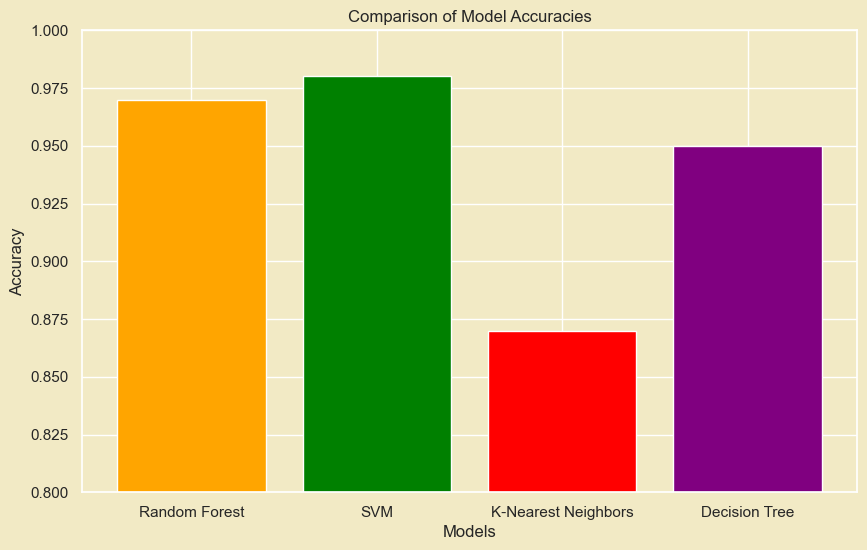

In [27]:
model_accuracies = {
    'Random Forest': 0.97,
    'SVM': 0.98,
    'K-Nearest Neighbors': 0.87,
    'Decision Tree': 0.95
}

# Creating the comparison chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['orange', 'green', 'red', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()